# Imports

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Loading and cleaning data

In [20]:
# Load data
DATA_PATH = "/Users/teymour/Desktop/cmor438/data/diamond-prices.csv"
df = pd.read_csv(DATA_PATH)

# Clean data (drop NA)
df = df.dropna()

In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Decision tree model

In [23]:
features = ['carat','cut','color','clarity','depth','table','x','y','z']
X = pd.get_dummies(df[features], columns=['cut','color','clarity'], drop_first=True)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation

MSE: 670538.71
MAE: 382.55
R²: 0.9566
Buffer Accuracy (±$500): 0.7925


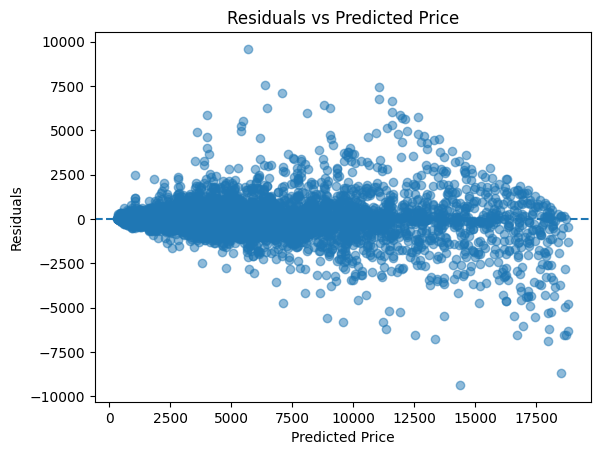

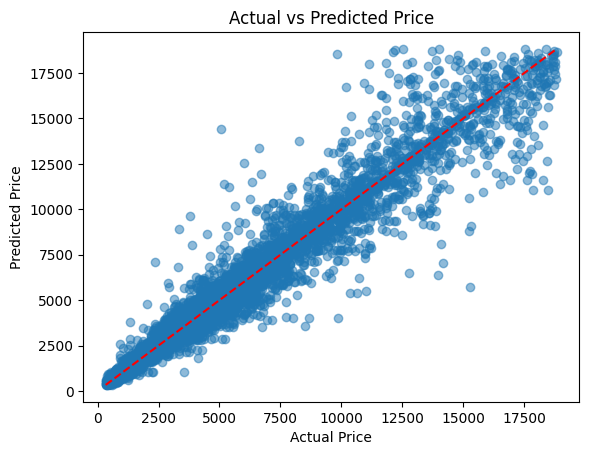

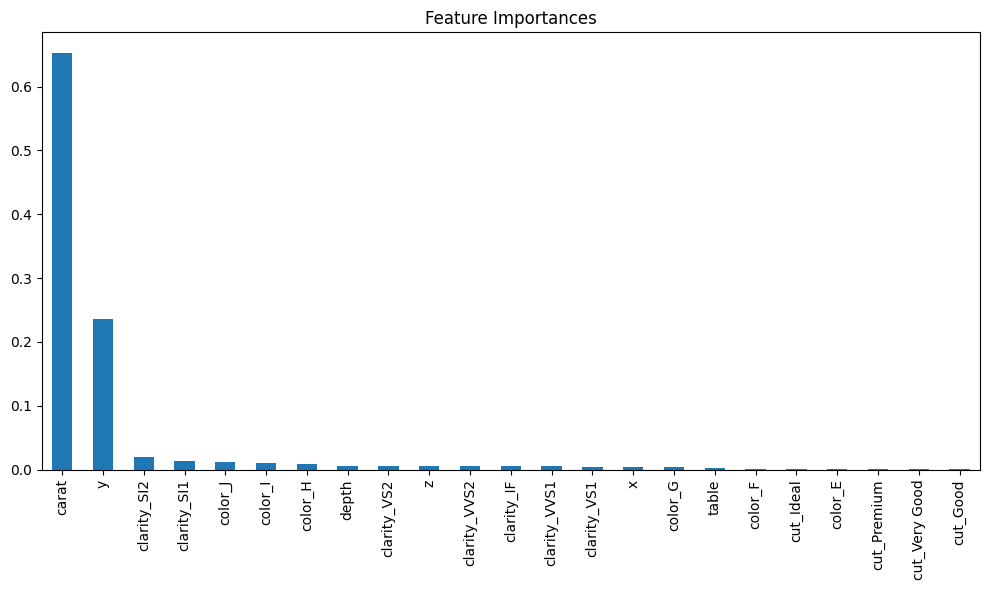

In [27]:
y_true = y_test
y_pred = model.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
buffer_accuracy = np.mean(np.abs(y_true - y_pred) <= 500)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"Buffer Accuracy (±$500): {buffer_accuracy:.4f}")

residuals = y_true - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

importances = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot.bar()
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


# Discussion of results

R² = 0.9566 and MAE = 382 indicate high accuracy driven by features carat and y, which explain over 90% of price variance. DecisionTreeRegressor exploits the strong nonlinear relationship between size and price without requiring feature scaling. Constant‐value leaves produce tight predictions for common samples and larger errors at extreme prices where data are sparse. Performance matches expectations given the dominant effect of diamond size and the tree’s capacity for simple, piecewise splits.